Collaborator: Shuo Wang 1005732049

Last Edited: 2024-01-23

Changes:


- **Deadline**: Feb 5, at 23:59PM.
- **Submission**: You need to submit your solutions through Crowdmark, including all your derivations, plots, and your code. You can produce the files however you like (e.g. LATEX, Microsoft Word, etc), as long as it is readable. Points will be deducted if we have a hard time reading your solutions or understanding the structure of your code.
- **Collaboration policy**: After attempting the problems on an individual basis, you may discuss and work together on the assignment with up to two classmates. However, **you must write your own code and write up your own solutions individually and explicitly name any collaborators** at the top of the homework.

# Q1 - Decision Theory

One successful use of probabilistic models is for building spam filters, which take in an email and take different actions depending on the likelihood that it’s spam.

Imagine you are running an email service. You have a well-calibrated spam classifier that tells you the probability that a particular email is spam: $p(spam|email)$. You have three options for what to do with each email: You can list it as important email, show it to the user, put it in the spam folder, or delete it entirely.

Depending on whether or not the email really is spam, the user will suffer a different amount  of wasted time for the different actions we can take, $L$(action, spam):

Action   | Spam        | Not spam
-------- | ----------- | -----------
Important| 15         | 0
Show     | 5          | 1
Folder   | 1           | 40
Delete   | 0           | 150

## Q1.1
[3pts] Plot the expected wasted user time for each of the three possible actions, as a function of the probability of spam: $p(spam|email)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

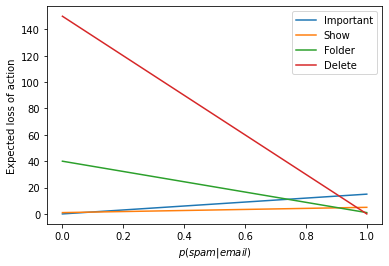

In [ ]:
losses = [[15, 0],[5, 1], [1, 40],[0, 150]]
actions_names = ['Important','Show', 'Folder', 'Delete']
num_actions = len(losses)

def expected_loss_of_action(prob_spam, action):
    #TODO: Return expected loss over a Bernoulli random variable
    # with mean prob_spam.
    # Losses are given by the table above.
  exp_loss = []
  if action == 0:  
    exp_loss = [x * 15 for x in prob_spam] 
  elif action == 1:
    exp_loss = [x * 5 + (1 - x) for x in prob_spam] 
  elif action == 2:
    exp_loss = [x + 40 * (1 - x) for x in prob_spam] 
  elif action == 3:
    exp_loss = [150 * (1 - x) for x in prob_spam] 
  return exp_loss

prob_range = np.linspace(0., 1., num=600)

# Make plot
for action in range(num_actions):
  plt.plot(prob_range, expected_loss_of_action(prob_range, action), label=actions_names[action])

plt.xlabel('$p(spam|email)$')
plt.ylabel('Expected loss of action')
plt.legend()


## Q1.2
[2pts] Write a function that computes the optimal action given the probability of spam.

In [ ]:
def optimal_action(prob_spam):
    #TODO: return best action given the probability of spam. 
    #Hint: np.argmin might be helpful.

    # Calcuate the mean of the expected losses given probability of spam
    loss = []; loss_i = 0; loss_s = 0; loss_f = 0; loss_d = 0; min_i = 0
    loss_i = sum(expected_loss_of_action(prob_spam, 0))/len(expected_loss_of_action(prob_spam, 0))
    loss_s = sum(expected_loss_of_action(prob_spam, 1))/len(expected_loss_of_action(prob_spam, 1))
    loss_f = sum(expected_loss_of_action(prob_spam, 2))/len(expected_loss_of_action(prob_spam, 2))
    loss_d = sum(expected_loss_of_action(prob_spam, 3))/len(expected_loss_of_action(prob_spam, 3))
    loss = [loss_i, loss_s, loss_f, loss_d]
    min_i = np.argmin([loss])

    if min_i == 0:
      return "Important"
    elif min_i == 1:
      return "Show"
    elif min_i == 2:
      return "Folder"  
    elif min_i == 3:
      return "Delete"
    else:
      return None


    

## Q1.3
[4pts] Plot the expected loss of the optimal action as a function of the probability of spam.


Color the line according to the optimal action for that probability of spam.


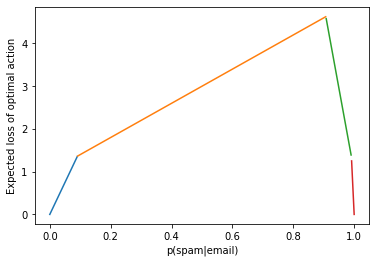

In [ ]:
prob_range = np.linspace(0., 1., num=600) 
optimal_losses = []
optimal_actions = []

optimal_losses_i = []; optimal_losses_s = []; optimal_losses_f = []; optimal_losses_d = []
prob_i = []; prob_s = []; prob_f = []; prob_d = []

for p in prob_range:
    # TODO: Compute the optimal action and its expected loss for
    # probability of spam given by p.
    if optimal_action([p]) == "Important":
      optimal_losses_i.append(expected_loss_of_action([p], 0))
      prob_i.append(p)
    elif optimal_action([p]) == "Show":
      optimal_losses_s.append(expected_loss_of_action([p], 1))
      prob_s.append(p)
    elif optimal_action([p]) == "Folder":
      optimal_losses_f.append(expected_loss_of_action([p], 2))
      prob_f.append(p)
    elif optimal_action([p]) == "Delete":
      optimal_losses_d.append(expected_loss_of_action([p], 3))
      prob_d.append(p)

plt.xlabel('p(spam|email)')
plt.ylabel('Expected loss of optimal action')
plt.plot(prob_i, optimal_losses_i)
plt.plot(prob_s, optimal_losses_s)
plt.plot(prob_f, optimal_losses_f)
plt.plot(prob_d, optimal_losses_d)



## Q1.4
[4pts] For exactly which range of the probabilities of an email being spam should we delete an email?

Find the exact answer by hand using algebra.


        
$150(1-x) < 15x => x > \frac{10}{11}$

$150(1-x) < x + 40(1-x) => x > \frac{110}{111}$

$150(1-x) < 5x + (1-x) => x > \frac{149}{154}$

$\frac{110}{111} < x < 1$





Your answer: $(\frac{10}{11}, 1]$



# Q2 - Naïve Bayes, A Generative Model

![](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true)


In this question, we'll fit a Naïve Bayes model to the fashion MNIST dataset, and use this model for making predictions and generating new images from the same distribution. MNIST is a dataset of 28x28 black-and-white images of items of clothing. We represent each image by a vector $x^{(i)} \in \{0,1\}^{784}$, where 0 and 1 represent white and black pixels respectively. Each class label $c^{(i)}$ is a different item of clothing, which in the code is represented by a 10-dimensional one-hot vector.

The Naïve Bayes model parameterized by $\theta$ and $\pi$ defines the following joint probability of $x$ and $c$,
$$p(x,c|\theta,\pi) = p(c|\pi)p(x|c,\theta) = p(c|\pi)\prod_{j=1}^{784}p(x_j|c,\theta),$$
where $x_j | c,\theta \sim \operatorname{Bernoulli}(\theta_{jc})$ or in other words $p(x_j | c,\theta) = \theta_{jc}^{x_j}(1-\theta_{jc})^{1-x_j}$, and $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$.

We begin by learning the parameters $\theta$ and $\pi$. The following code will download and prepare the training and test sets.

In [3]:
import numpy as np
import random
import os
import gzip
import struct
import array
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve

def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def fashion_mnist():
    base_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'

    def parse_labels(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data = struct.unpack(">II", fh.read(8))
            return np.array(array.array("B", fh.read()), dtype=np.uint8)

    def parse_images(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
            return np.array(array.array("B", fh.read()), dtype=np.uint8).reshape(num_data, rows, cols)

    for filename in ['train-images-idx3-ubyte.gz',
                     'train-labels-idx1-ubyte.gz',
                     't10k-images-idx3-ubyte.gz',
                     't10k-labels-idx1-ubyte.gz']:
        download(base_url + filename, filename)

    train_images = parse_images('data/train-images-idx3-ubyte.gz')
    train_labels = parse_labels('data/train-labels-idx1-ubyte.gz')
    test_images = parse_images('data/t10k-images-idx3-ubyte.gz')
    test_labels = parse_labels('data/t10k-labels-idx1-ubyte.gz')
    # Remove the data point that cause log(0)
    remove = (14926, 20348, 36487, 45128, 50945, 51163, 55023)
    train_images = np.delete(train_images,remove, axis=0)
    train_labels = np.delete(train_labels, remove, axis=0)
    return train_images, train_labels, test_images[:1000], test_labels[:1000]


def load_fashion_mnist():
    partial_flatten = lambda x: np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))
    one_hot = lambda x, k: np.array(x[:, None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels =  fashion_mnist()
    train_images = (partial_flatten(train_images) / 255.0 > .5).astype(float)
    test_images = (partial_flatten(test_images) / 255.0 > .5).astype(float)
    train_labels = one_hot(train_labels, 10)
    test_labels = one_hot(test_labels, 10)
    N_data = train_images.shape[0]

    return N_data, train_images, train_labels, test_images, test_labels

## Q2.1
[2pts] Derive the expression for the Maximum Likelihood Estimator (MLE) of $\theta$ and $\pi$.


The likelihood function is:

\begin{align}
L &= P(x_1,...,x_N, c^i|\theta, \pi)\\
&= \prod_{i=1}^N[P(c^i|\pi)\prod_{j=1}^{784}P(x^i_j|c^i,\theta)]
\end{align}

The log-likelihood function is:
\begin{align}
        l &= log\prod_{i=1}^N[P(c^i|\pi)\prod_{j=1}^{784}P(x_j|c^i,\theta)]\\
        &= \sum_{i=1}^N[logP(c^i|\pi)+log\sum_{j=1}^{784}P(x^i_j|c^i,\theta)]\\
        &= \sum_{i=1}^NlogP(c^i|\pi)+\sum_{i=1}^N\sum_{j=1}^{784}logP(x^i_j|c^i,\theta)\\
        &= \sum_{i=1}^Nlog\pi^{c^i}(1-\pi)^{1-c^i}+\sum_{i=1}^N\sum_{j=1}^{784}log\theta_{jc}^{x_j^i}(1-\theta_{jc})^{1-x_j^i}
\end{align}

The first term: 

\begin{align}
l_1&=  \sum_{i=1}^Nlog\pi^{c^i}(1-\pi)^{1-c^i} \\
&= \sum_{i=1}^Nc^ilog\pi+\sum_{i=1}^N(1-c^i)log(1-\pi)
\end{align}

\begin{align}
\frac{\partial l_1}{\partial\pi} = \sum_{i=1}^N\frac{c^i}{\pi} - \sum_{i=1}^N\frac{1-c^i}{1-\pi} &= 0\\
\sum_{i=1}^Nc^i-\sum_{i=1}^N\pi &=0\\
N\pi &= \sum_{i=1}^Nc^i\\
\hat{\pi} &= \frac{\sum_{i=1}^Nc^i}{N} = \frac{\sum_i1[c^i = 1]}{N}
\end{align}

The second term:

\begin{align}
l_2 &= \sum_{i=1}^Nlog\theta_{jc}^{x_j^i}(1-\theta_{jc})^{1-x_j^i}\\
&= \sum_{i=1}^N[x_j^ilog\theta_{jc} + (1-x_j^i)log(1-\theta_{jc})]\\
&=\sum_{i=1}^Nc^i[x_j^ilog\theta_{j1}+(1-x_j^i)log(1-\theta_{j1})] \\
&+\sum_{i=1}^N(1-c^i)[x_j^ilog\theta_{j0}+(1-x_j^i)log(1-\theta_{j_0})]
\end{align}

For $c = 1$:

\begin{align}
\frac{\partial l_2}{\partial\theta} = \sum_{i=1}^N \frac{c^ix_j^i}{\theta_{j1}}-\sum_{i=1}^N\frac{c^i(1-x_j^i)}{1-\theta_{j1}} &= 0\\
\sum_{i=1}^Nc^i\theta_{j1}&= \sum_{i=1}^Nc^ix_j^i\\
\hat{\theta}_{j1} &=  \frac{\sum_{i=1}^Nc^ix_j^i}{\sum_{i=1}^Nc^i} = \frac{\sum_i 1[x_j^i = 1 \&c^i = 1]}{\sum_i 1[c^i=1]}
\end{align}

Similarly for $c = 0$:

\begin{align}
\hat{\theta}_{j0} = \frac{\sum_i 1[x_j^i = 1 \&c^i = 0]}{\sum_i 1[c^i=0]}
\end{align}

Thus,

\begin{align}
\hat{\theta}_{jc} = \frac{\sum_i 1[x_j^i = 1 \&c^i = c]}{\sum_i 1[c^i=c]}
\end{align}


Your answer: $\hat{\pi} = \frac{\sum_i1[c^i = 1]}{N}$, $\hat{\theta}_{jc} = \frac{\sum_i 1[x_j^i = 1 \&c^i = c]}{\sum_i 1[c^i=c]}$

Reference: Week2 Tutorial Notes


## Q2.2
[4pts] Using the MLE for this data, many entries of $\theta$ will be estimated to be 0, which seems extreme. So we look for another estimation method.

Assume the prior distribution of $\theta$ is such that the entries are i.i.d. and drawn from $\operatorname{Beta}(2,2)$. Derive the Maximum A Posteriori (MAP) estimator for $\theta$ (it has a simple final form). You can return the MLE for $\pi$ in your implementation. From now on, we will work with this estimator.

\begin{align}
\hat{\theta}_{jc,map} &= argmax_{\theta_{jc}}P(\theta_{jc}|x_j, c)\\
&= argmax_{\theta_{jc}}\prod_{i=1}^N\pi_c\prod_{j=1}^{784}\theta_{jc}^{x_j^i}(1 -\theta_{jc})^{1-x_j^i}Beta(2,2)\\
&= argmax_{\theta_{jc}}\prod_{i=1}^N\pi_c\prod_{j=1}^{784}\theta_{jc}^{x_j^i}(1 -\theta_{jc})^{1-x_j^i} \frac{\theta_{jc}^{2-1}(1-\theta_{jc})^{2-1}} {B(2,2)}\\
&\propto argmax_{\theta_{jc}} \theta_{jc}^{\sum_i1[c^i = c]x_j^i+2-1}(1-\theta_{jc})^{\sum_i1[c^i = c](1-x_j^i)+2-1}
\end{align}

Notice the form of a Beta posterior with $\alpha' = \sum_i1[c^i = c]x_j^i+2$ and $\beta'= \sum_i1[c^i = c](1-x_j^i)+2$

Therefore, the MAP estimator is the mode $\hat{\theta}_{jc,map} = \frac{\alpha'-1}{\alpha'+\beta'-2}$, where $\alpha'$ and $\beta'$ are described above.

Your answer:  $\hat{\theta}_{jc,map} = \frac{\alpha'-1}{\alpha'+\beta'-2}$, where $\alpha' = \sum_i^N1[c^i = c]x_j^i+2$ and $\beta'= \sum_i^N1[c^i = c](1-x_j^i)+2$

Reference:
https://web.stanford.edu/class/archive/cs/cs109/cs109.1206/lectureNotes/LN22_map.pdf

http://www.mi.fu-berlin.de/wiki/pub/ABI/Genomics12/MLvsMAP.pdf


In [4]:
def train_map_estimator(train_images, train_labels):
    """ Inputs: train_images (N_samples x N_features), train_labels (N_samples x N_classes)
        Returns the MAP estimator theta_est (N_features x N_classes) and the MLE
        estimator pi_est (N_classes)"""
    N = len(train_images)
    #N_features x N_classes 784 x 10
    x_class = np.matmul(np.transpose(train_images), train_labels) 
    #MAP estimator of theta
    theta_est = (x_class + 1)/(N+2)
    #MLE estimator of pi
    pi_est = sum(train_labels)/N

    return theta_est, pi_est





In [5]:
train_map_estimator(train_images, train_labels)[0]

NameError: ignored

## Q2.3
[5pts] Derive an expression for the class log-likelihood $\log p(c|x,\theta,\pi)$ for a single image. Then, complete the implementation of the following functions. Recall that our prediction rule is to choose the class that maximizes the above log-likelihood, and accuracy is defined as the fraction of samples that are correctly predicted.

Report the average log-likelihood $\frac{1}{N}\sum_{i=1}^{N}\log p(c^{(i)}|x^{(i)},\hat{\theta},\hat{\pi})$ (where $N$ is the number of samples) on the training test, as well the training and test errors.

\begin{align}
log p(c|x,\theta, \pi) &= log\frac{\pi_c\prod_{j=1}^{784}p(x_j^i|c,\theta_{jc}, \pi)}{\sum_{d=1}^{10}\pi_{c_d}p(x_j^i|c_d,\theta_{jc_d}, \pi)}\\
&= log \frac{\pi_c\prod_{j=1}^{784}p(x_j^i|c,\theta_{jc}, \pi)}{C}\\
&\propto log [\pi_c\prod_{j=1}^{784}p(x_j^i|c,\theta_{jc}, \pi)]\\
&=log[\pi_c\prod_{j=1}^{784}\theta_{jc}^{x_j}(1-\theta_{jc})^{1-x_j}]\\
&= log\pi_c+\sum_{j=1}^{784}[x_jlog\theta_{jc}+(1-x_j)log(1-\theta_{jc})]
\end{align}

Your answer:


In [7]:
def log_likelihood(images, theta, pi):
    """ Inputs: images (N_samples x N_features), theta, pi
        Returns the matrix 'log_like' of loglikehoods over the input images where
        log_like[i,c] = log p (c |x^(i), theta, pi) using the estimators theta and pi.
        log_like is a matrix of (N_samples x N_classes)
    Note that log likelihood is not only for c^(i), it is for all possible c's."""
    C = theta.shape[1]
    log_like = np.log(pi) + images@np.log(theta)+(1-images)@np.log(1-theta)
    return log_like
    


def accuracy(log_like, labels):
    """ Inputs: matrix of log likelihoods and 1-of-K labels (N_samples x N_classes)
    Returns the accuracy based on predictions from log likelihood values"""
    N = log_like.shape[0]
    max_index = []
    pred = np.zeros((N, log_like.shape[1]))
    
    for i in range(N):
      max_index.append(np.argmax(log_like[i]))
      pred[i][max_index[i]] = 1
    
    error = pred != labels

    return sum(error.sum(axis = 0))/N


N_data, train_images, train_labels, test_images, test_labels = load_fashion_mnist()
theta_est, pi_est = train_map_estimator(train_images, train_labels)

loglike_train = log_likelihood(train_images, theta_est, pi_est)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = log_likelihood(test_images, theta_est, pi_est)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MAP is {avg_loglike:.3f}")
print(f"Training accuracy for MAP is {train_accuracy:.3f}")
print(f"Test accuracy for MAP is {test_accuracy:.3f}")

Average log-likelihood for MAP is -723.493
Training accuracy for MAP is 0.984
Test accuracy for MAP is 0.966


## Q2.4
[2pts] Given this model's assumptions, is it always true that any two pixels $x_i$ and $x_j$ with $i \neq j$ are indenepdent given $c$? How about after marginalizing over $c$? Explain your answer.


Your answer:

The Naive Bayes classifier assumes that the presence of a particular feature in a class is independent of the presence of any other features in the class. Therefore, any two distinct pixcels are independent of each other given the same class. 

If we marginalize over the class, then we can only consider unconditional independence, and it may not hold in this case. If we observe the location of one particular pixcel on an image in a class, then we may expect that the pixcel will have the same location on the other images in the class. Thus, there may exist correlation between the location of pixcels. 

## Q2.5 
[4pts] Since we have a generative model for our data, we can do more than just prediction. Randomly sample and plot 10 images from the learned distribution using the MAP estimates. (Hint: You first need to sample the class $c$, and then sample pixels conditioned on $c$.)

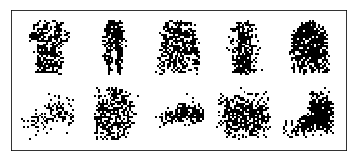

In [8]:
def image_sampler(theta, pi, num_images):
    """ Inputs: parameters theta and pi, and number of images to sample
    Returns the sampled images (N_images x N_features)"""
    Nc = 10
    Np = 784
    pix = np.zeros((Np, num_images))
    x = []
    c = []
    
    for i in range(num_images):
      c.append(random.randint(1, num_images)) #num_image x 1
      p = [0]*784
      for j in range(784):
        p[j] = np.random.binomial(n = 1, p = (theta[j][i])/pi[i])
      pix[:,i] = p

    return np.transpose(pix)
        

def plot_images(images, ims_per_row=5, padding=5, image_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=0., vmax=1.):
    """Images should be a (N_images x pixels) matrix."""
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)

    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = vmin
    concat_images = np.full(((image_dimensions[0] + padding) * N_rows + padding,
                             (image_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], image_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + image_dimensions[0]) * row_ix
        col_start = padding + (padding + image_dimensions[1]) * col_ix
        concat_images[row_start: row_start + image_dimensions[0],
                      col_start: col_start + image_dimensions[1]] = cur_image
        cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    
    plt.plot()


sampled_images = image_sampler(theta_est, pi_est, 10)
plot_images(sampled_images)

## Q2.6
[4pts] One of the advantages of generative models is that they can handle missing data, or be used to answer different sorts of questions about the model. Assume we have only observed some pixels of the image. Let $x_E = \{x_p : \text{pixel $p$ is observed}\}$. Derive an expression for $p(x_j|x_E,\theta,\pi)$, the conditional probability of an unobserved pixel $j$ given the observed pixels and distribution parameters. (Hint: You have to marginalize over $c$.)

\begin{align}
p(x_j|x_E, \theta, \pi) &= \sum_cp(x_j|x_E,\theta,\pi, c_j)\frac{p(x_E|\theta, \pi, c_d)p(c_d|\pi)}{\sum_{d=1}^{10}p(x_E|\theta, \pi, c_d)p(c_d|\pi)}\\
&= \sum_cp(x_j|\theta,\pi, c_j)\frac{p(x_E|\theta, \pi, c_d)p(c_d|\pi)}{\sum_{d=1}^{10}p(x_E|\theta, \pi, c_d)p(c_d|\pi)}\\
&= \sum_cp(x_j|\theta,\pi, c_j)\frac{p(x_E|\theta, \pi, c_d)\pi_{c_d}}{\sum_{d=1}^{10}p(x_E|\theta, \pi, c_d)\pi_{c_d}}
\end{align}

Your answer: $p(x_j|x_E, \theta, \pi) = \sum_cp(x_j|\theta,\pi, c_j)\frac{p(x_E|\theta, \pi, c_d)\pi_{c_d}}{\sum_{d=1}^{10}p(x_E|\theta, \pi, c_d)\pi_{c_d}}$


## Q2.7
[4pts] We assume that only 30% of the pixels are observed. For the first 20 images in the training set, plot the images when the unobserved pixels are left as white, as well as the same images when the unobserved pixels are filled with the marginal probability of the pixel being 1 given the observed pixels, i.e. the value of the unobserved pixel $j$ is $p(x_j = 1|x_E,\theta,\pi)$.

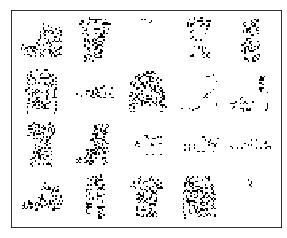

In [10]:
def probabilistic_imputer(theta, pi, original_images, is_observed):
    """Inputs: parameters theta and pi, original_images (N_images x N_features), 
        and is_observed which has the same shape as original_images, with a value
        1. in every observed entry and 0. in every unobserved entry.
    Returns the new images where unobserved pixels are replaced by their 
    conditional probability"""
    
    # YOU NEED TO WRITE THIS PART
    N = original_images.shape[0]
    log_joint = np.array([np.sum(np.tile(np.log(theta[:, c]), (N, 1)) * (original_images * is_observed) \
                                 + np.tile(np.log(1 - theta[:, c]), (N, 1)) * ((1 - original_images) * is_observed), axis=1) \
                          + np.log(pi[c]) for c in range(len(pi))])
    log_like = log_joint - np.tile(np.log(np.sum(np.exp(log_joint), axis=0)), (len(pi), 1))

    classes = np.array([np.random.choice(len(pi), 1, p=np.exp(log_like[:,i]))[0] for i in range(N)])
    imputed_images = (1 - is_observed) * theta[:, classes].T + is_observed * original_images
    return imputed_images


num_features = train_images.shape[1]
is_observed = np.random.binomial(1, p=0.3, size=(20, num_features))
plot_images(train_images[:20] * is_observed)

In [2]:
imputed_images = probabilistic_imputer(theta_est, pi_est, train_images[:20], is_observed)
plot_images(imputed_images)

NameError: ignored

array([0.09996166, 0.10001167, 0.10001167, 0.10001167, 0.10001167,
       0.10001167, 0.099995  , 0.10001167, 0.09996166, 0.10001167])